## Визуализация

Визуализация занимает важную часть в анализе данных. Представляя информацию в графическом виде, вы облегчаете процесс ее восприятия, что дает возможность выделять дополнительные закономерности, оценивать соотношения величин, быстрее доносить ключевые аспекты в данных.

Начнем с небольшой "памятки", о которой всегда нужно помнить при создании любых графиков.

Как визуализировать данные и заставить всех тебя ненавидеть
1. Заголовок графика для слабаков. По графику всегда понятно, какие данные и явления он описывает.
2. Ни в коем случае не подписывай ни одной оси у графика. Пусть смотрящий развивает свою интуицую!
3. Единицы измерения совсем не обязательны. Какая разница, в чем измеряли количество - в людях или в литрах!
4. Чем меньше шрифт на графике, тем острее зрение смотрящего.
5. На одном графике нужно стараться уместить всю информацию, которая у тебя есть в датасете. С полными названиями, расшифровками, сносками. Чем больше текста - тем информативнее!
6. При любой возможности используйте 3D и спецэффекты, пусть знают, что ты — прирожденный дизайнер. К тому же, так будет меньше визуальных искажений.

В *python* есть три основные библиотеки для визуализации:
* matplotlib
* seaborn
* plotly

## matplotlib

[Официальная документация](https://matplotlib.org/), в которой есть очень много классной информации с примерами и гайдами.

`matplotlib` это внешняя библиотека, поэтому ее нужно установить.

```bash
pip install matplotlib
```

`matplotlib` это самый базовый пакет, который позволяет вам строить простые графики для анализа данных. Он универсальный, он может работать и обычными списками, `np.ndarray` и `pandas`.

Для того чтобы начать пользоваться пакетом нужно его импортировать. Уже исторически сложилось, что пишут команду `%matplolib inline`. Она позволяет не вызывать функцию `plt.show()`, чтобы каждый раз просить нарисовать график.

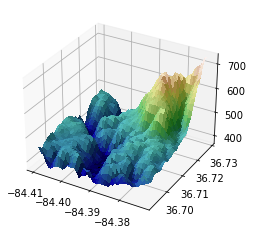

In [2]:
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

# Load and format data
dem = cbook.get_sample_data('jacksboro_fault_dem.npz', np_load=True)
z = dem['elevation']
nrows, ncols = z.shape
x = np.linspace(dem['xmin'], dem['xmax'], ncols)
y = np.linspace(dem['ymin'], dem['ymax'], nrows)
x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

### Работаем со списками

Чтобы построить самый простой график нужно просто использовать функцию `plot` и передать туда список. Тогда по оси _x_ у вас будут числа от 0 с шагом 1, а по оси _y_ числа, которые вы передали.

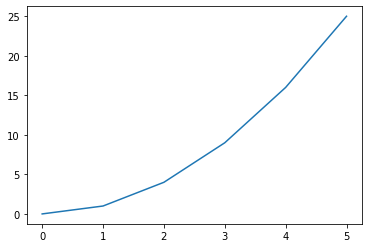

In [4]:
plt.plot([0, 1, 4, 9, 16, 25])

Если вам не нравится надпись над графиком, то можно поставить `;` в конце и надпись уйдет.

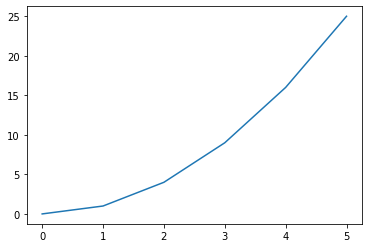

In [5]:
plt.plot([0, 1, 4, 9, 16, 25]);

Зачастую вы захотите контролировать и ось _x_, вы можете указать ее.

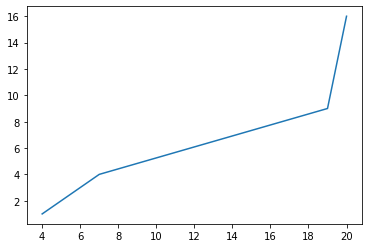

In [6]:
plt.plot([4, 7, 19, 20], [1, 4, 9, 16]);

Как видно по дефолту по вашим точкам строится линия, но вы можете изменить это поведение с помощью третьего параметра (`fmt`). Вы можете посмотреть различные варианты по [ссылке](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) в секции *markers*.

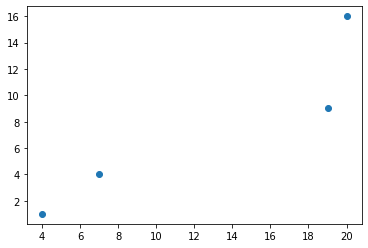

In [8]:
plt.plot([4, 7, 19, 20], [1, 4, 9, 16], 'o');

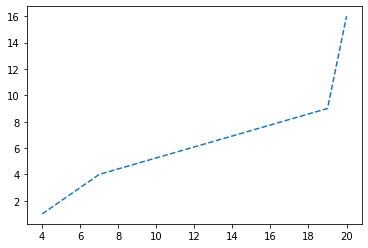

In [26]:
plt.plot([4, 7, 19, 20], [1, 4, 9, 16], '--');

Конечно же, когда мы рисуем график мы хотим подписать оси и дать название графику. Можно это сделать с помощью других функций.

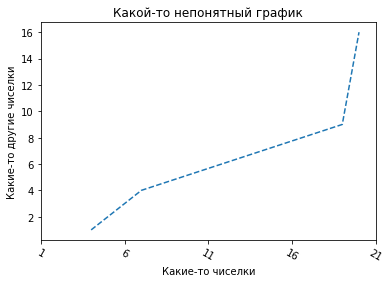

In [4]:
plt.plot([4, 7, 19, 20], [1, 4, 9, 16], '--')
plt.xlabel('Какие-то чиселки')
plt.ylabel('Какие-то другие чиселки')
plt.title('Какой-то непонятный график')
plt.xticks(range(1, 22, 5), rotation = -30);

Если вы хотите поменять цвет, то вы можете использовать аргумент `color`. Передать туда можно название цвета или передать его в кодировке hex. Попробуй выбрать на [сайте](https://www.color-hex.com).

In [ ]:
plt.xticks()

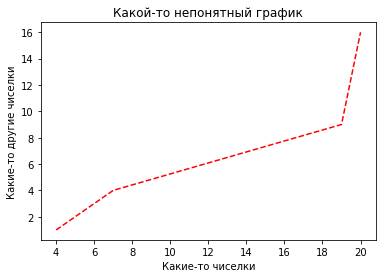

In [31]:
plt.plot([4, 7, 19, 20], [1, 4, 9, 16], '--', color='red')
plt.xlabel('Какие-то чиселки')
plt.ylabel('Какие-то другие чиселки')
plt.title('Какой-то непонятный график');

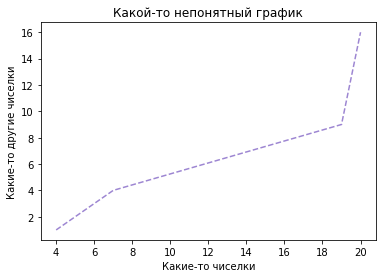

In [28]:
plt.plot([4, 7, 19, 20], [1, 4, 9, 16], '--', color='#9d86d2')
plt.xlabel('Какие-то чиселки')
plt.ylabel('Какие-то другие чиселки')
plt.title('Какой-то непонятный график');

Давайте попробуем сделать две линии на графике. Для этого просто подряд нарисуем каждую из линий по очереди.

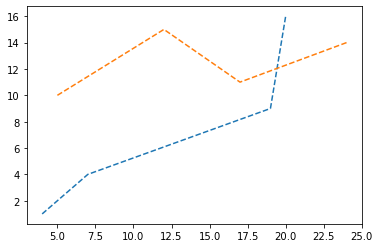

In [35]:
plt.plot([4, 7, 19, 20], [1, 4, 9, 16], '--')
plt.plot([5, 12, 17, 24], [10, 15, 11, 14], '--');

График получился, но мы не понимаем что есть что. Нам нужна легенда. Для этого нужно добавить в каждый график аргумент `label` и вызвать функцию `legend`. А также можно указать с помощью параметра `loc` указать где должна находиться эта легенда.

* upper right
* upper left
* lower left
* lower right
* right
* center left
* center right
* lower center
* upper center
* center

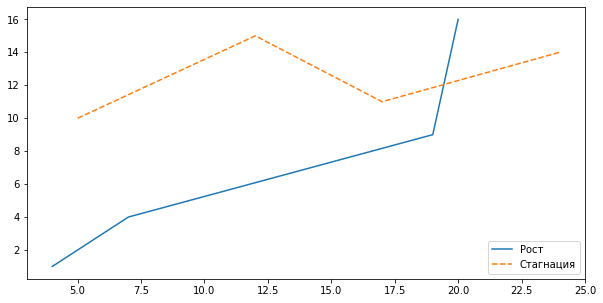

In [2]:
plt.figure(figsize=(10, 5))
plt.plot([4, 7, 19, 20], [1, 4, 9, 16], '-', label='Рост')
plt.plot([5, 12, 17, 24], [10, 15, 11, 14], '--',  label='Стагнация')
plt.legend(loc='lower right');

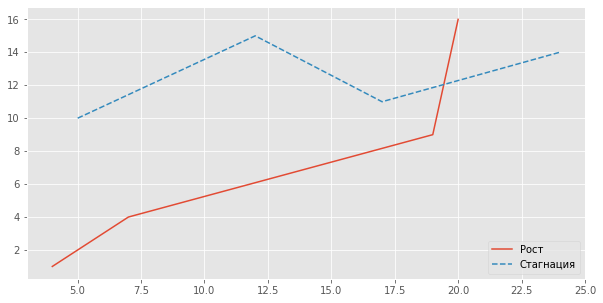

In [4]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 5))
plt.plot([4, 7, 19, 20], [1, 4, 9, 16], '-', label='Рост')
plt.plot([5, 12, 17, 24], [10, 15, 11, 14], '--',  label='Стагнация')
plt.legend(loc='lower right');

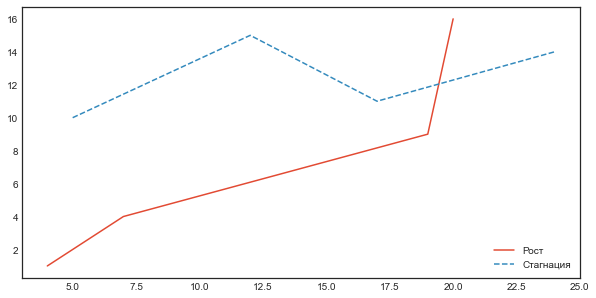

In [5]:
plt.style.use('seaborn-white')

plt.figure(figsize=(10, 5))
plt.plot([4, 7, 19, 20], [1, 4, 9, 16], '-', label='Рост')
plt.plot([5, 12, 17, 24], [10, 15, 11, 14], '--',  label='Стагнация')
plt.legend(loc='lower right');

Есть много аргументов, с помощью которых вы можете менять график. Например, `linewidth` – ширина линии. Из важных параметров есть еще аргумент `alpha`, который задает прозрачность. Это бывает удобно, когда данных много и точки накладываются друг на друга.

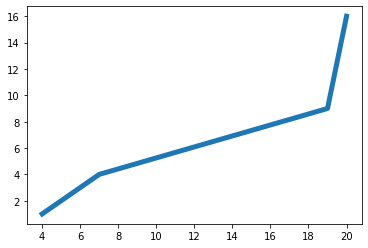

In [49]:
plt.plot([4, 7, 19, 20], [1, 4, 9, 16], linewidth=5);

Вспомним `numpy`, c помощью которого можно сгенерировать выборку из какого-то распределения. Давайте сгенерим из нормального 5000 точек.

In [5]:
import numpy as np

In [9]:
import numpy as np


sample = np.random.normal(loc=5, scale=12, size=5_000)
sample[:5]

array([ -6.01645497,  28.72173166,   8.25528814,   7.05531185,
       -11.94637044])

До сих пор мы использовали только функцию `plot`, которая может построить и временной ряд и облако точек(*scatter plot*). Но есть и другие графики, которые хотелось бы рисовать. Я отмечу `histplot` (для непрерывных данных) и `barplot (для категориальных)`.

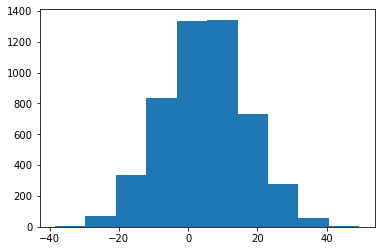

In [43]:
plt.hist(sample);

In [ ]:
plt.hist()

Вы можете увеличить количество бинов с помощью аргумента `bins`.

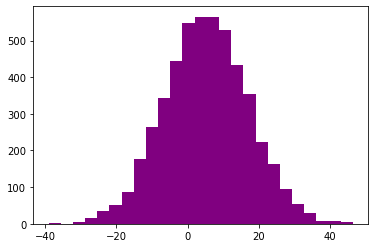

In [11]:
plt.hist(sample, bins=25, color='purple');

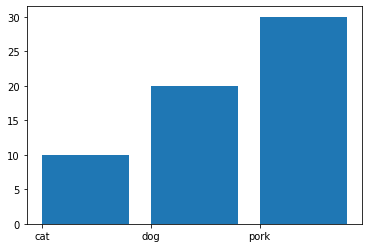

In [46]:
plt.bar(['cat', 'dog', 'pork'], height=[10, 20, 30]);

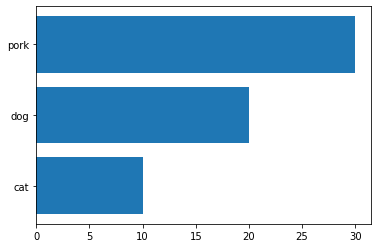

In [49]:
plt.barh(['cat', 'dog', 'pork'], width=[10, 20, 30]);

Если вы хотите увеличить график, то можете задать его размеры сами.

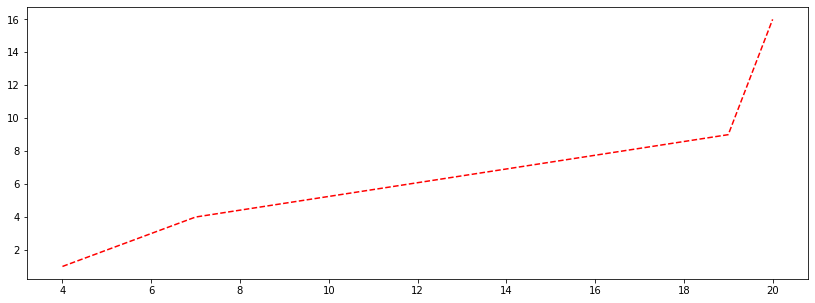

In [50]:
plt.figure(figsize=(14, 5))
plt.plot([4, 7, 19, 20], [1, 4, 9, 16], '--', color='red');

Если вы хотите сделать 2 графика рядом друг с другом, то можно создать один большой график и добавлять свои части.
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

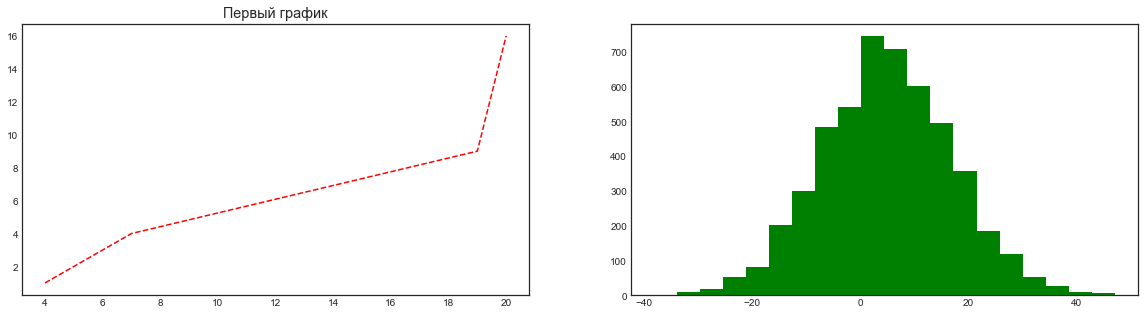

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))  # 1 строка, 2 столбца
ax1.plot([4, 7, 19, 20], [1, 4, 9, 16], '--', color='red');
ax1.set_title('Первый график')
ax2.hist(sample, bins=20, color='green');
plt.savefig('foo.png')

### Работаем с pandas

Давайте возьмем датасет и поработаем с `pandas` и `matplotlib`.

<center>
    <img src="images/USA.png" width=500px>
</center>

Этот набор данных, сформированный после переписи населения США в 2015 году.

Немножко информации о некоторых переменных:

* `state` -- название штата США (всего 50)
* `county` -- округ штата
* `region` -- регион
* `metro` -- есть ли метро
* `population` -- количество жителей
* `men` -- количество мужчин
* `women` -- количество женщин
* `unemployment` -- процент безработицы
* `land area` -- площадь округа
* `private_work`, `public_work`, `self_employed`, `family_work` -- процент работающих на частные компании, на государство, на себя и процент работающих в семейном бизнесе
* `employed` -- частный предприниматель
* `income` -- доход
* `walk` -- количество граждан (в %), которые ходят на работу пешком


In [6]:
import pandas as pd

In [15]:
df = pd.read_csv('counties.csv')

Сколько наблюдений и переменных в нашем наборе данных? Что является наблюдением? Какое первое значение в переменной?

In [16]:
df.shape

(3138, 40)

In [18]:
df

,census_id,state,county,region,metro,population,men,women,hispanic,white,...,other_transp,work_at_home,mean_commute,employed,private_work,public_work,self_employed,family_work,unemployment,land_area
0,1001,Alabama,Autauga,South,Metro,55221,26745,28476,2.6,75.8,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,594.44
1,1003,Alabama,Baldwin,South,Metro,195121,95314,99807,4.5,83.1,...,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,1589.78
2,1005,Alabama,Barbour,South,Nonmetro,26932,14497,12435,4.6,46.2,...,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,884.88
3,1007,Alabama,Bibb,South,Metro,22604,12073,10531,2.2,74.5,...,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,622.58
4,1009,Alabama,Blount,South,Metro,57710,28512,29198,8.6,87.9,...,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,644.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,56037,Wyoming,Sweetwater,West,Nonmetro,44772,23359,21413,15.8,79.9,...,0.9,1.6,21.0,23010,78.6,17.7,3.7,0.0,5.4,10426.65
3134,56039,Wyoming,Teton,West,Nonmetro,22311,11537,10774,15.1,81.2,...,4.9,5.5,14.4,14298,81.3,11.2,7.5,0.0,2.6,3995.38
3135,56041,Wyoming,Uinta,West,Nonmetro,20930,10636,10294,8.9,87.8,...,1.6,3.0,20.4,10064,75.4,19.0,5.6,0.0,4.4,2081.26
3136,56043,Wyoming,Washakie,West,Nonmetro,8400,4144,4256,14.0,82.4,...,2.8,4.5,12.3,3892,70.5,21.5,7.6,0.5,6.8,2238.55


In [17]:
df.head(2)

,census_id,state,county,region,metro,population,men,women,hispanic,white,...,other_transp,work_at_home,mean_commute,employed,private_work,public_work,self_employed,family_work,unemployment,land_area
0,1001,Alabama,Autauga,South,Metro,55221,26745,28476,2.6,75.8,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,594.44
1,1003,Alabama,Baldwin,South,Metro,195121,95314,99807,4.5,83.1,...,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,1589.78


In [ ]:
df.iloc

In [15]:
df.iloc[0]

census_id                1001
state                 Alabama
county                Autauga
region                  South
metro                   Metro
population              55221
men                     26745
women                   28476
hispanic                  2.6
white                    75.8
black                    18.5
native                    0.4
asian                     1.0
pacific                   0.0
citizens                40725
income                  51281
income_err               2391
income_per_cap          24974
income_per_cap_err       1080
poverty                  12.9
child_poverty            18.6
professional             33.2
service                  17.0
office                   24.2
construction              8.6
production               17.1
drive                    87.5
carpool                   8.8
transit                   0.1
walk                      0.5
other_transp              1.3
work_at_home              1.8
mean_commute             26.5
employed  

Отберите наблюдения только для штатов `California`.

In [21]:
california = df[df.state == 'California']
california.head(2)

,census_id,state,county,region,metro,population,men,women,hispanic,white,...,other_transp,work_at_home,mean_commute,employed,private_work,public_work,self_employed,family_work,unemployment,land_area
185,6001,California,Alameda,West,Metro,1584983,776699,808284,22.6,33.0,...,3.5,5.6,30.7,778132,78.7,13.8,7.4,0.1,8.3,739.02
186,6003,California,Alpine,West,Nonmetro,1131,654,477,9.5,64.1,...,1.8,13.7,24.3,408,57.4,32.8,9.8,0.0,10.7,738.33


In [18]:
california.shape

(58, 40)

Отберите наблюдения только для штатов `California` и `Florida`.

In [27]:
california_and_florida = df[df['state'].isin(['California', 'Florida'])]
california_and_florida

,census_id,state,county,region,metro,population,men,women,hispanic,white,...,other_transp,work_at_home,mean_commute,employed,private_work,public_work,self_employed,family_work,unemployment,land_area
185,6001,California,Alameda,West,Metro,1584983,776699,808284,22.6,33.0,...,3.5,5.6,30.7,778132,78.7,13.8,7.4,0.1,8.3,739.02
186,6003,California,Alpine,West,Nonmetro,1131,654,477,9.5,64.1,...,1.8,13.7,24.3,408,57.4,32.8,9.8,0.0,10.7,738.33
187,6005,California,Amador,West,Nonmetro,36995,20012,16983,12.9,79.7,...,0.9,5.6,29.3,12573,64.5,23.4,11.8,0.3,14.0,594.58
188,6007,California,Butte,West,Metro,222564,110115,112449,15.2,73.8,...,3.9,5.8,19.9,89411,71.8,17.3,10.5,0.5,12.1,1636.46
189,6009,California,Calaveras,West,Nonmetro,44767,22143,22624,11.1,82.5,...,0.8,7.5,33.6,16248,65.2,20.3,13.9,0.6,12.1,1020.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,12125,Florida,Union,South,Nonmetro,15191,9830,5361,5.3,70.2,...,0.1,3.3,23.0,3955,60.3,35.5,4.0,0.2,11.7,243.56
381,12127,Florida,Volusia,South,Metro,503719,245481,258238,12.1,73.9,...,2.9,5.0,25.3,199287,81.8,12.1,5.9,0.2,9.1,1101.03
382,12129,Florida,Wakulla,South,Metro,31128,17366,13762,3.7,78.8,...,1.0,1.6,33.0,12899,60.9,34.8,4.0,0.2,9.3,606.42
383,12131,Florida,Walton,South,Metro,59487,30176,29311,5.9,84.3,...,3.2,5.2,27.2,25377,80.0,10.5,9.2,0.2,7.9,1037.63


In [28]:
california_and_florida.shape

(125, 40)

In [115]:
california_and_florida.tail(2)

,census_id,state,county,region,metro,population,men,women,hispanic,white,...,other_transp,work_at_home,mean_commute,employed,private_work,public_work,self_employed,family_work,unemployment,land_area
383,12131,Florida,Walton,South,Metro,59487,30176,29311,5.9,84.3,...,3.2,5.2,27.2,25377,80.0,10.5,9.2,0.2,7.9,1037.63
384,12133,Florida,Washington,South,Nonmetro,24629,13478,11151,3.4,77.4,...,2.9,2.3,29.3,8307,72.5,18.8,8.4,0.3,11.5,582.80


`matplotlib` есть прямо в `pandas`. Можно использовать его там или отдельно.

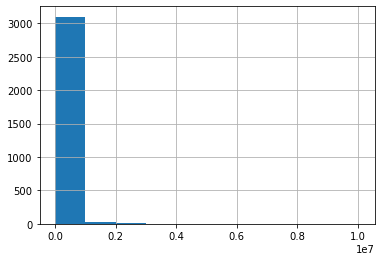

In [29]:
df['population'].hist();

На такой график не очень приятно смотреть, давайте логарифируем ось *y*, увеличим график и сделаем 15 бинов.

In [ ]:
1_000_000
1e7 = 1 * 10**6

0.00000001
1e-7 = 1 / 10^7

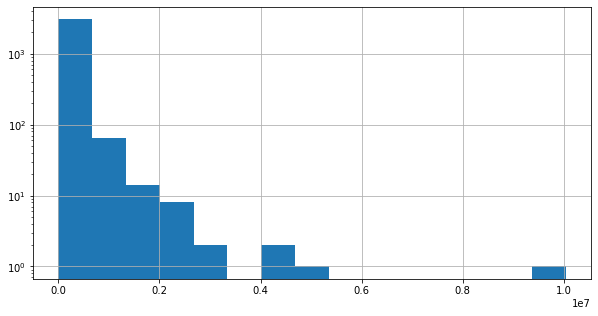

In [30]:
df['population'].hist(log=True, figsize=(10, 5), bins=15);

Можно было сделать и напрямую через `matplotlib`.

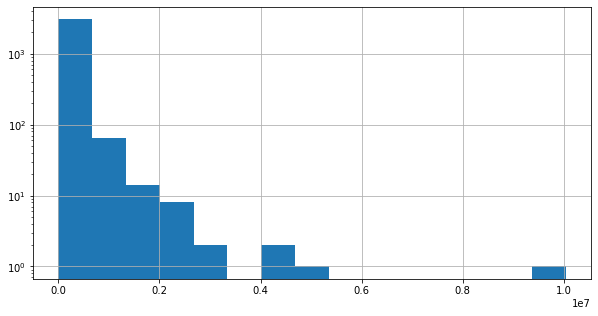

In [31]:
plt.figure(figsize=(10, 5))
plt.hist('population', data=df, log=True, bins=15);
plt.grid()  # добавить сетку

Или так.

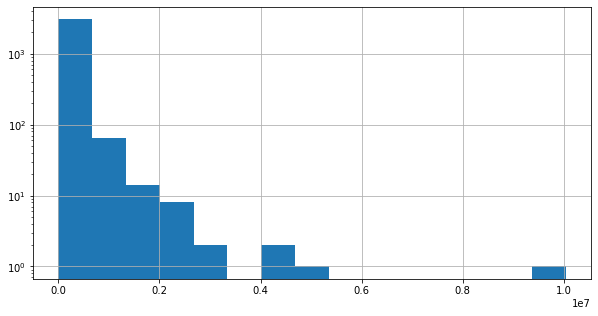

In [32]:
plt.figure(figsize=(10, 5))
plt.hist(df['population'], log=True, bins=15);
plt.grid()  # добавить сетку

In [33]:
import seaborn as sns

<module 'seaborn' from 'D:\\AnacondaPython\\lib\\site-packages\\seaborn\\__init__.py'>

In [34]:
df.query('population < 10000')
# df[df['population'] < 100_000]

,census_id,state,county,region,metro,population,men,women,hispanic,white,...,other_transp,work_at_home,mean_commute,employed,private_work,public_work,self_employed,family_work,unemployment,land_area
31,1063,Alabama,Greene,South,Nonmetro,8697,4095,4602,0.7,17.8,...,2.1,2.3,30.5,2412,75.8,17.2,7.0,0.0,20.4,647.11
67,2013,Alaska,Aleutians East Borough,West,Nonmetro,3304,2198,1106,12.0,15.0,...,2.2,2.8,4.9,2519,78.6,15.4,5.9,0.2,2.9,6981.94
68,2016,Alaska,Aleutians West Census Area,West,Nonmetro,5684,3393,2291,11.0,27.8,...,3.2,4.9,7.6,3787,77.9,18.9,3.2,0.0,2.1,4390.28
71,2060,Alaska,Bristol Bay Borough,West,Nonmetro,970,553,417,7.1,53.4,...,3.0,5.0,10.4,541,49.7,39.2,11.1,0.0,5.4,503.84
72,2068,Alaska,Denali Borough,West,Nonmetro,2060,1126,934,2.6,84.7,...,2.4,26.7,17.9,1210,66.4,24.5,7.9,1.2,2.3,12751.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,56019,Wyoming,Johnson,West,Nonmetro,8600,4525,4075,4.4,94.8,...,3.1,7.3,31.1,4300,71.7,19.2,8.2,0.9,3.6,4154.15
3128,56027,Wyoming,Niobrara,West,Nonmetro,2516,1164,1352,2.6,91.5,...,2.8,11.6,17.2,1114,42.2,38.0,18.7,1.2,1.6,2626.04
3130,56031,Wyoming,Platte,West,Nonmetro,8750,4495,4255,7.7,89.5,...,2.5,10.4,17.9,4133,63.4,21.8,14.8,0.0,2.4,2084.21
3136,56043,Wyoming,Washakie,West,Nonmetro,8400,4144,4256,14.0,82.4,...,2.8,4.5,12.3,3892,70.5,21.5,7.6,0.5,6.8,2238.55


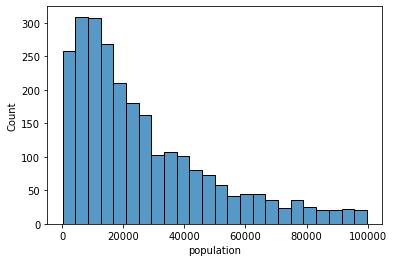

In [36]:
sns.histplot(
    data=df.query('population < 100_000'), 
    x='population',
);

Давайте попробуем увидеть зависимость между доходом и количеством людей, которые ходят пешком. Функция `scatter` как и `plot`, только рисует точки.

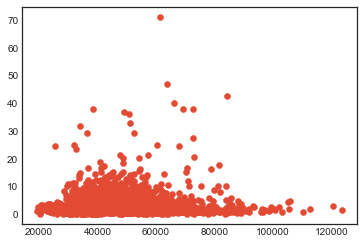

In [34]:
plt.scatter('income', 'walk', data=df);

Непонятно что происходит на этом графике, потому что облако внизу может лежать под наклоном и зависимость на самом деле есть. А также точки наслаиваются друг на друга, поэтому используем параметр `alpha`. А также посмотрим зависимость в логарифмах.

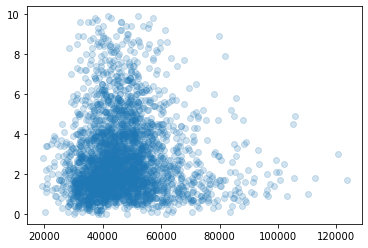

In [38]:
plt.scatter('income', 'walk', data=df[df['walk'] < 10], alpha=0.2);

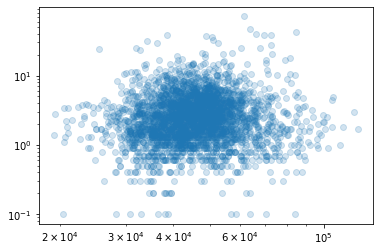

In [170]:
fig, ax = plt.subplots()
ax.scatter('income', 'walk', data=df, alpha=0.2);
ax.set_yscale('log')
ax.set_xscale('log')

In [39]:
df.state.value_counts()

Texas             253
Georgia           159
Virginia          133
Kentucky          120
Missouri          115
Kansas            105
Illinois          102
North Carolina    100
Iowa               99
Tennessee          95
Nebraska           93
Indiana            92
Ohio               88
Minnesota          87
Michigan           83
Mississippi        82
Oklahoma           77
Arkansas           75
Wisconsin          72
Florida            67
Pennsylvania       67
Alabama            67
South Dakota       65
Colorado           64
Louisiana          64
New York           62
California         58
Montana            56
West Virginia      55
North Dakota       53
South Carolina     46
Idaho              44
Washington         39
Oregon             36
New Mexico         33
Utah               29
Alaska             28
Maryland           24
Wyoming            23
New Jersey         21
Nevada             17
Maine              16
Arizona            15
Vermont            14
Massachusetts      14
New Hampsh

In [41]:
df_top10_state = (
    df
    .groupby('state')
    .agg(population=('population', 'sum'))
    .reset_index()
    .sort_values('population', ascending=False)
    .head(10)
)
df_top10_state.head(3)

,state,population
4,California,38421464
42,Texas,26538497
31,New York,19673174


In [ ]:
df.agg()

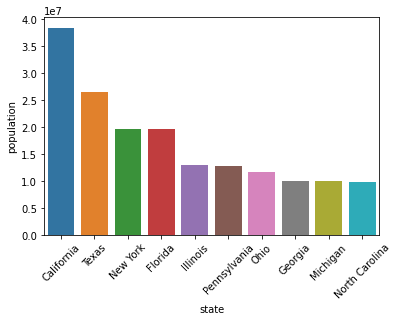

In [42]:
sns.barplot(data=df_top10_state, x='state', y='population')
plt.xticks(rotation=45);

In [56]:
df.head()

,census_id,state,county,region,metro,population,men,women,hispanic,white,...,other_transp,work_at_home,mean_commute,employed,private_work,public_work,self_employed,family_work,unemployment,land_area
0,1001,Alabama,Autauga,South,Metro,55221,26745,28476,2.6,75.8,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,594.44
1,1003,Alabama,Baldwin,South,Metro,195121,95314,99807,4.5,83.1,...,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,1589.78
2,1005,Alabama,Barbour,South,Nonmetro,26932,14497,12435,4.6,46.2,...,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,884.88
3,1007,Alabama,Bibb,South,Metro,22604,12073,10531,2.2,74.5,...,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,622.58
4,1009,Alabama,Blount,South,Metro,57710,28512,29198,8.6,87.9,...,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,644.78


In [43]:
df.sort_values('population', ascending=False).head(3)

,census_id,state,county,region,metro,population,men,women,hispanic,white,...,other_transp,work_at_home,mean_commute,employed,private_work,public_work,self_employed,family_work,unemployment,land_area
203,6037,California,Los Angeles,West,Metro,10038388,4945351,5093037,48.2,26.9,...,2.3,5.1,30.0,4635465,79.0,11.5,9.4,0.2,10.0,4057.88
608,17031,Illinois,Cook,North Central,Metro,5236393,2537245,2699148,24.7,43.1,...,2.2,4.2,32.3,2463655,83.9,11.5,4.5,0.1,10.7,945.33
2620,48201,Texas,Harris,South,Metro,4356362,2166727,2189635,41.6,31.7,...,2.0,3.3,28.2,2081889,83.4,10.1,6.3,0.1,7.5,1703.48


In [ ]:
# groupby
group value
  A     10
  A     30
  B     12
  B     15
  B     24
    
group mean_value
  A        20
  B       25.5

In [ ]:
# window function
group value
  A     10
  A     30
  B     12
  B     15
  B     24
    
group value  sum_value
  A     10       40
  A     30       40
  B     12       51
  B     15       51
  B     24       51

In [44]:
test_df = pd.DataFrame([
    ['A', 1, 10],
    ['A', 2, 10],
    ['B', 1, 12],
    ['B', 1, 15],
    ['B', 2, 24],
], columns=['state', 'okrug', 'value'])

In [45]:
test_df

,state,okrug,value
0,A,1,10
1,A,2,10
2,B,1,12
3,B,1,15
4,B,2,24


In [46]:
# groupby
test_df.groupby('state').agg(total_value=('value', 'sum').reset_index()

,state,total_value
0,A,20
1,B,51


In [70]:
# window function
test_df['total_value'] = test_df.groupby('state')['value'].transform('sum')
test_df

,state,okrug,value,total_value
0,A,1,10,40
1,A,2,30,40
2,B,1,12,51
3,B,1,15,51
4,B,2,24,51


In [47]:
test_df['rank'] = test_df.groupby('state')['value'].rank(method="average", ascending=False)

In [48]:
test_df

,state,okrug,value,rank
0,A,1,10,1.5
1,A,2,10,1.5
2,B,1,12,3.0
3,B,1,15,2.0
4,B,2,24,1.0


In [75]:
test_df.query('rank <= 2')

,state,okrug,value,total_value,rank
0,A,1,10,40,2.0
1,A,2,30,40,1.0
3,B,1,15,51,2.0
4,B,2,24,51,1.0


### Работа с датой и временем

Для даты и времени в python есть свои объекты: `datetime`, `date` и `timedelta`. Все они находятся в пакете `datetime`. Он встроенный, ничего устанавливать не надо.

In [1]:
from datetime import date, datetime, timedelta

Из `str` можно сделать `datetime`.

In [2]:
datetime_ = datetime.strptime('2022-02-24', '%Y-%m-%d')
print(datetime_)
print(type(datetime_))

2022-02-24 00:00:00
<class 'datetime.datetime'>


Из `datetime` можно получить `date`. Чаще вы будете работать именно с типом `date`.

In [3]:
date_ = datetime_.date()
print(date_)
print(type(date_))

2022-02-24
<class 'datetime.date'>


Можно узнать текущее время.

In [53]:
datetime.today()

datetime.datetime(2022, 10, 12, 14, 0, 53, 574243)

In [54]:
datetime.today().date()

datetime.date(2022, 10, 12)

Есть разные атрибуты и методы, которые можно использовать.

In [88]:
datetime.today().year

2022

In [89]:
datetime.today().month

10

In [90]:
datetime.today().day

7

Какой месяц был 50 дней назад?

In [180]:
(datetime.today() - timedelta(days=50)).month

8

Можно обратно преобразовать дату в строку.

In [181]:
datetime.today().strftime('%d/%m/%Y')

'07/10/2022'

В pandas можно преобразовывать колонку в дату.

In [55]:
pd.to_datetime('01/01/20')

Timestamp('2020-01-01 00:00:00')

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/ahmedushka7/R/master/docs/scripts/hse_data_analysis/sem_7/data/bundesliga.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14018 entries, 0 to 14017
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   X1         14018 non-null  int64 
 1   HomeTeam   14018 non-null  object
 2   AwayTeam   14018 non-null  object
 3   HomeGoals  14018 non-null  int64 
 4   AwayGoals  14018 non-null  int64 
 5   Round      14018 non-null  int64 
 6   Year       14018 non-null  int64 
 7   Date       14016 non-null  object
dtypes: int64(5), object(3)
memory usage: 876.2+ KB


In [8]:
df.Date.max()

TypeError: '>=' not supported between instances of 'str' and 'float'

In [9]:
df['normal_date'] = pd.to_datetime(df['Date'])

In [10]:
df['normal_date'].max()

Timestamp('2009-05-23 00:00:00+0000', tz='UTC')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14018 entries, 0 to 14017
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   X1           14018 non-null  int64              
 1   HomeTeam     14018 non-null  object             
 2   AwayTeam     14018 non-null  object             
 3   HomeGoals    14018 non-null  int64              
 4   AwayGoals    14018 non-null  int64              
 5   Round        14018 non-null  int64              
 6   Year         14018 non-null  int64              
 7   Date         14016 non-null  object             
 8   normal_date  14016 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(5), object(3)
memory usage: 985.8+ KB


In [99]:
df['year'] = df['normal_date'].apply(lambda x: x.year)

In [100]:
df.head(2)

,X1,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Round,Year,Date,normal_date,year
0,1,Werder Bremen,Borussia Dortmund,3,2,1,1963,1963-08-24T00:00:00Z,1963-08-24 00:00:00+00:00,1963.0
1,2,Hertha BSC Berlin,1. FC Nuernberg,1,1,1,1963,1963-08-24T00:00:00Z,1963-08-24 00:00:00+00:00,1963.0


In [102]:
# df.groupby('year')['HomeTeam'].count().reset_index()

Для более продвинутых вещей есть еще пакет `dateutil`. Он тоже встроенный, можно почитать о нем в интернете.

In [81]:
import dateutil

## Полезные материалы по правилам оформления графиков

1. Twenty rules for good graphics https://robjhyndman.com/hyndsight/graphics/
2. Много статей и примеров https://www.darkhorseanalytics.com/blog. Например, как оформлять таблицы с резульатами https://www.darkhorseanalytics.com/portfolio/2016/1/7/data-looks-better-naked-clear-off-the-table.
3. Видео-лекция по визуализации из курса Open Data Science https://www.youtube.com/watch?v=uwQat1TV0JM

## Дополнительные хорошие библиотеки python по визуализации

* Bokeh
* ggplot(аналогия ggplot2 в R)
* geoplotlib
* pygal